# Final Project 3 (PYTN-KS18)
##### Anggota Kelompok :
1. Abraham Linggom Tampubolon
2. Farhan Ihtifazhuddin
3. Meila Suci

# Perkenalan
#### A. Latar Belakang:
Gagal jantung, suatu kondisi yang melibatkan ketidakmampuan jantung untuk memompa darah dengan efisien, menjadi isu kesehatan global yang terus berkembang. Menurut World Health Organization (WHO), gagal jantung memiliki dampak signifikan terhadap kualitas hidup pasien dan merupakan penyebab utama kematian di seluruh dunia. Oleh karena itu, pemahaman mendalam tentang faktor-faktor yang mendasari dan mempengaruhi perkembangan gagal jantung menjadi krusial untuk meningkatkan strategi diagnosis, pengelolaan, dan pencegahannya.

Dalam beberapa tahun terakhir, jumlah data klinis yang tersedia untuk penelitian medis mengalami peningkatan. Salah satu sumber data yang yang akan digunakan adalah dataset "heartfailureclinicalrecordsdataset.csv," yang menyimpan informasi rinci terkait gagal jantung.

Data klinis ini mencakup parameter-parameter kunci seperti usia pasien, riwayat diabetes, tekanan darah tinggi, fraksi ejeksi jantung, dan faktor-faktor lainnya yang dapat berperan dalam perkembangan gagal jantung. Melalui analisis mendalam terhadap dataset ini, tidak hanya akan memungkinkan identifikasi faktor-faktor risiko utama, tetapi juga memfasilitasi pengembangan model prediktif yang dapat meningkatkan kemampuan diagnosis dan pencegahan.

Pentingnya projek ini juga terletak pada potensinya untuk memberikan panduan kepada praktisi medis dan penyedia layanan kesehatan dalam merancang intervensi yang lebih efektif. Dengan memahami karakteristik pasien yang lebih rentan terhadap gagal jantung, dokter dapat melakukan pendekatan yang lebih terarah dalam merancang rencana pengelolaan kesehatan pasien. Selain itu, pemahaman yang lebih baik tentang hubungan antara variabel klinis tertentu dalam mempengaruhi resiko gagal jantung kepada setiap pasien.

Dengan merencanakan proyek machine learning dengan metode ensemble, seperti penggabungan model-model yang berbeda, kita dapat meningkatkan akurasi dan kehandalan prediksi sehingga memberikan kontribusi penting terhadap pengembangan solusi yang lebih canggih dan responsif terhadap kebutuhan kompleks pasien gagal jantung.

Dengan kata lain, proyek ini bukan hanya mencari jawaban terhadap pertanyaan medis yang mendesak, tetapi juga memberikan kontribusi terhadap upaya global dalam meningkatkan manajemen bagi mereka yang terkena dampak gagal jantung. Melalui pendekatan machine learning ini, kita dapat meningkatkan efisiensi sistem perawatan kesehatan dan menghadapi tantangan serius yang dihadapi oleh pasien gagal jantung dengan cara yang lebih inovatif.

#### B. Data yang Digunakan:
Dataset yang digunakan dalam proyek ini adalah "heartfailureclinicalrecordsdataset.csv." Data set ini menyediakan informasi klinis rinci tentang pasien-pasien yang mengalami gagal jantung. Beberapa variabel dalam data set meliputi usia pasien, riwayat diabetes, tekanan darah tinggi, fraksi ejeksi jantung, dan faktor-faktor lain yang dapat berperan dalam perkembangan gagal jantung. Untuk lebih lengkapnya adalah sebagai berikut:

-  age - umur pasien
-  anaemia - apakah ada pengurangan haemoglobin
-  creatinine_phosphokinase - level enzim CPK dalam mcg/L
-  diabetes - apakah pasien punya riwayat diabetes
-  ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
-  high_blood_pressure - apakah pasien punya darah tinggi
-  platelets - jumlah platelet di darah dalam kiloplatelets/mL
-  serum_creatinine - level serum creatinine di darah dalam mg/dL
-  serum_sodium - level serum sodium di darah dalam mEq/L
-  sex - apakah pasien pria atau wanita
-  smoking - apakah pasien merokok
-  time - waktu dalam hari untuk follow-up
-  DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

#### C. Objective yang Ingin Dicapai:
Tujuan dari projek ini adalah untuk melakukan analisis mendalam, mengidentifikasi faktor-faktor risiko, mengembangkan model prediktif, dan memberikan wawasan berharga untuk meningkatkan pemahaman dan manajemen gagal jantung. Dengan mencapai tujuan-tujuan ini, memberikan kontribusi positif terhadap pemahaman dan manajemen penyakit gagal jantung, serta memberikan dasar untuk pengembangan pendekatan pengelolaan yang lebih efektif dan responsif.

# Import pustaka
Berikut adalah daftar library yang akan digunakan dalam proyek ini:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Data Loading
Melakukan proses data loading dari dataset "weatherAUS.csv".

In [3]:
df = pd.read_csv("heartfailureclinicalrecordsdataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


In [4]:
# Melihat dimensi dataset
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Mendeskripsikan variabel numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


# Data Cleaning
Melakukan proses cleaning pada data, seperti memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dsb.


In [7]:
# Cek jumlah Duplikat yang sama persis
df[df.duplicated(keep=False)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [8]:
# Mengetahui jumlah nilai unik pada tiap kolom
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

## Handling missing value

In [9]:
# Memeriksa kolom yang memiliki missing value
pd.DataFrame(df.isna().sum())

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


# Explorasi Data

## Histogram Distribusi Masing Masing Kolom

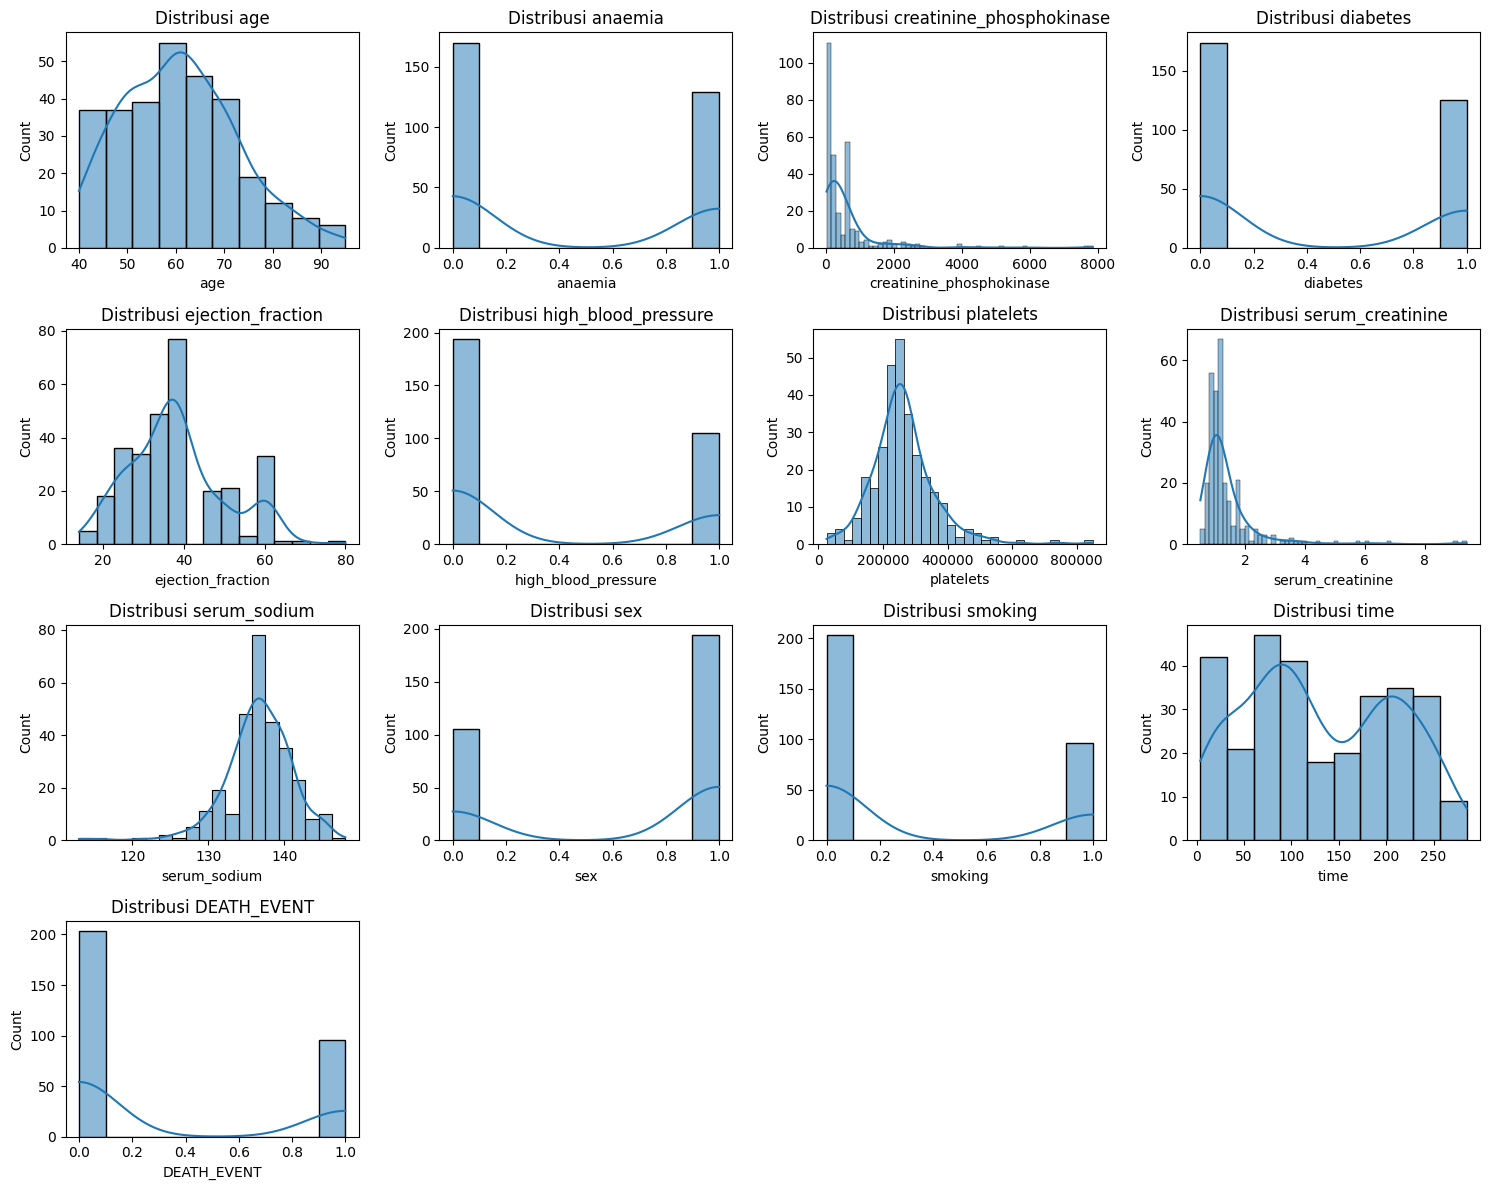

In [10]:
# Mengidentifikasi kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))

# Loop untuk setiap kolom numerik
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()


## Diagram Batang Death_Event berdasarkan sex, smoking, diabetes, high_blood_pressure

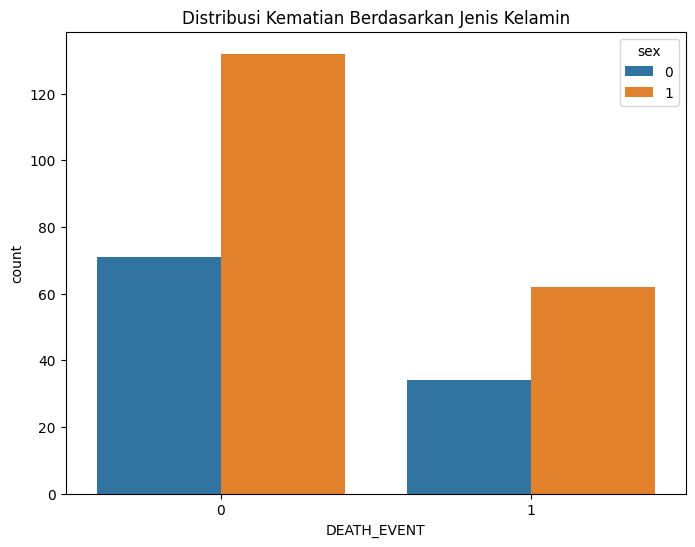

In [11]:
# Diagram batang untuk DEATH_EVENT dengan hue berdasarkan sex
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', hue='sex', data=df)
plt.title('Distribusi Kematian Berdasarkan Jenis Kelamin')
plt.show()


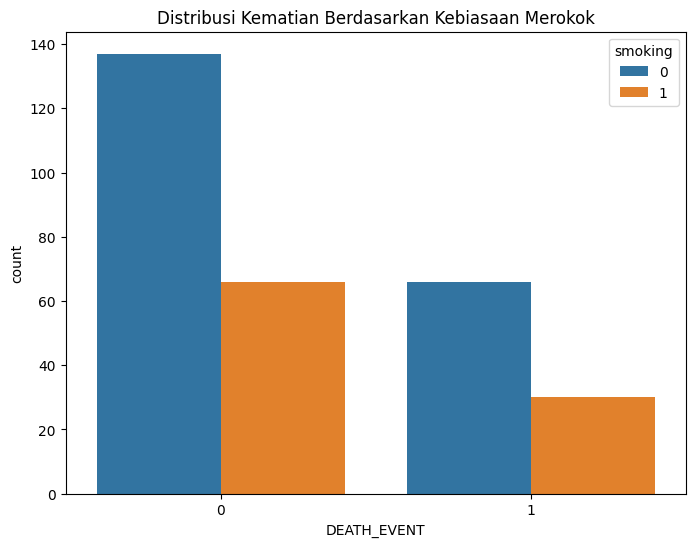

In [12]:
# Diagram batang untuk DEATH_EVENT dengan hue berdasarkan smoking
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', hue='smoking', data=df)
plt.title('Distribusi Kematian Berdasarkan Kebiasaan Merokok')
plt.show()


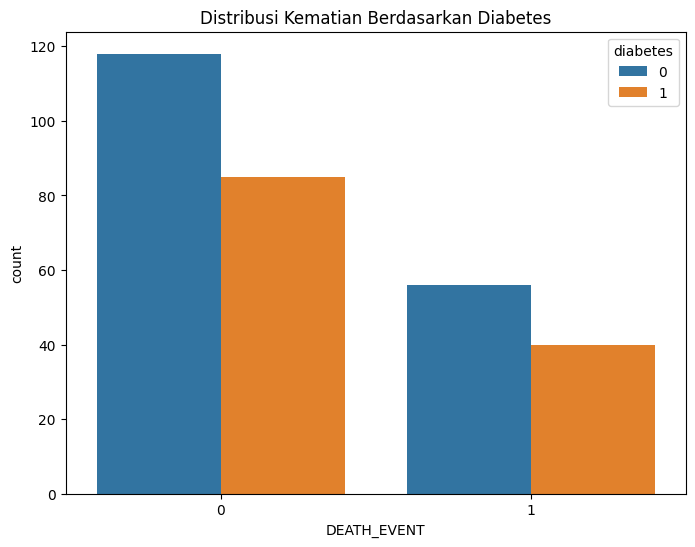

In [13]:
# Diagram batang untuk 'DEATH_EVENT' dengan hue berdasarkan 'diabetes'
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', hue='diabetes', data=df)
plt.title('Distribusi Kematian Berdasarkan Diabetes')
plt.show()

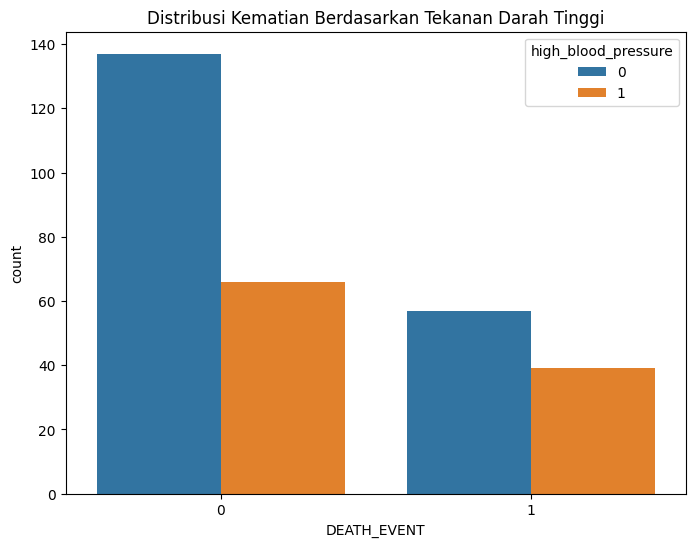

In [14]:
# Diagram batang untuk 'DEATH_EVENT' dengan hue berdasarkan 'high_blood_pressure'
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', hue='high_blood_pressure', data=df)
plt.title('Distribusi Kematian Berdasarkan Tekanan Darah Tinggi')
plt.show()

## Scatter plot distribusi dan hubungan antara variabel-variabel dengan DEATH_EVENT

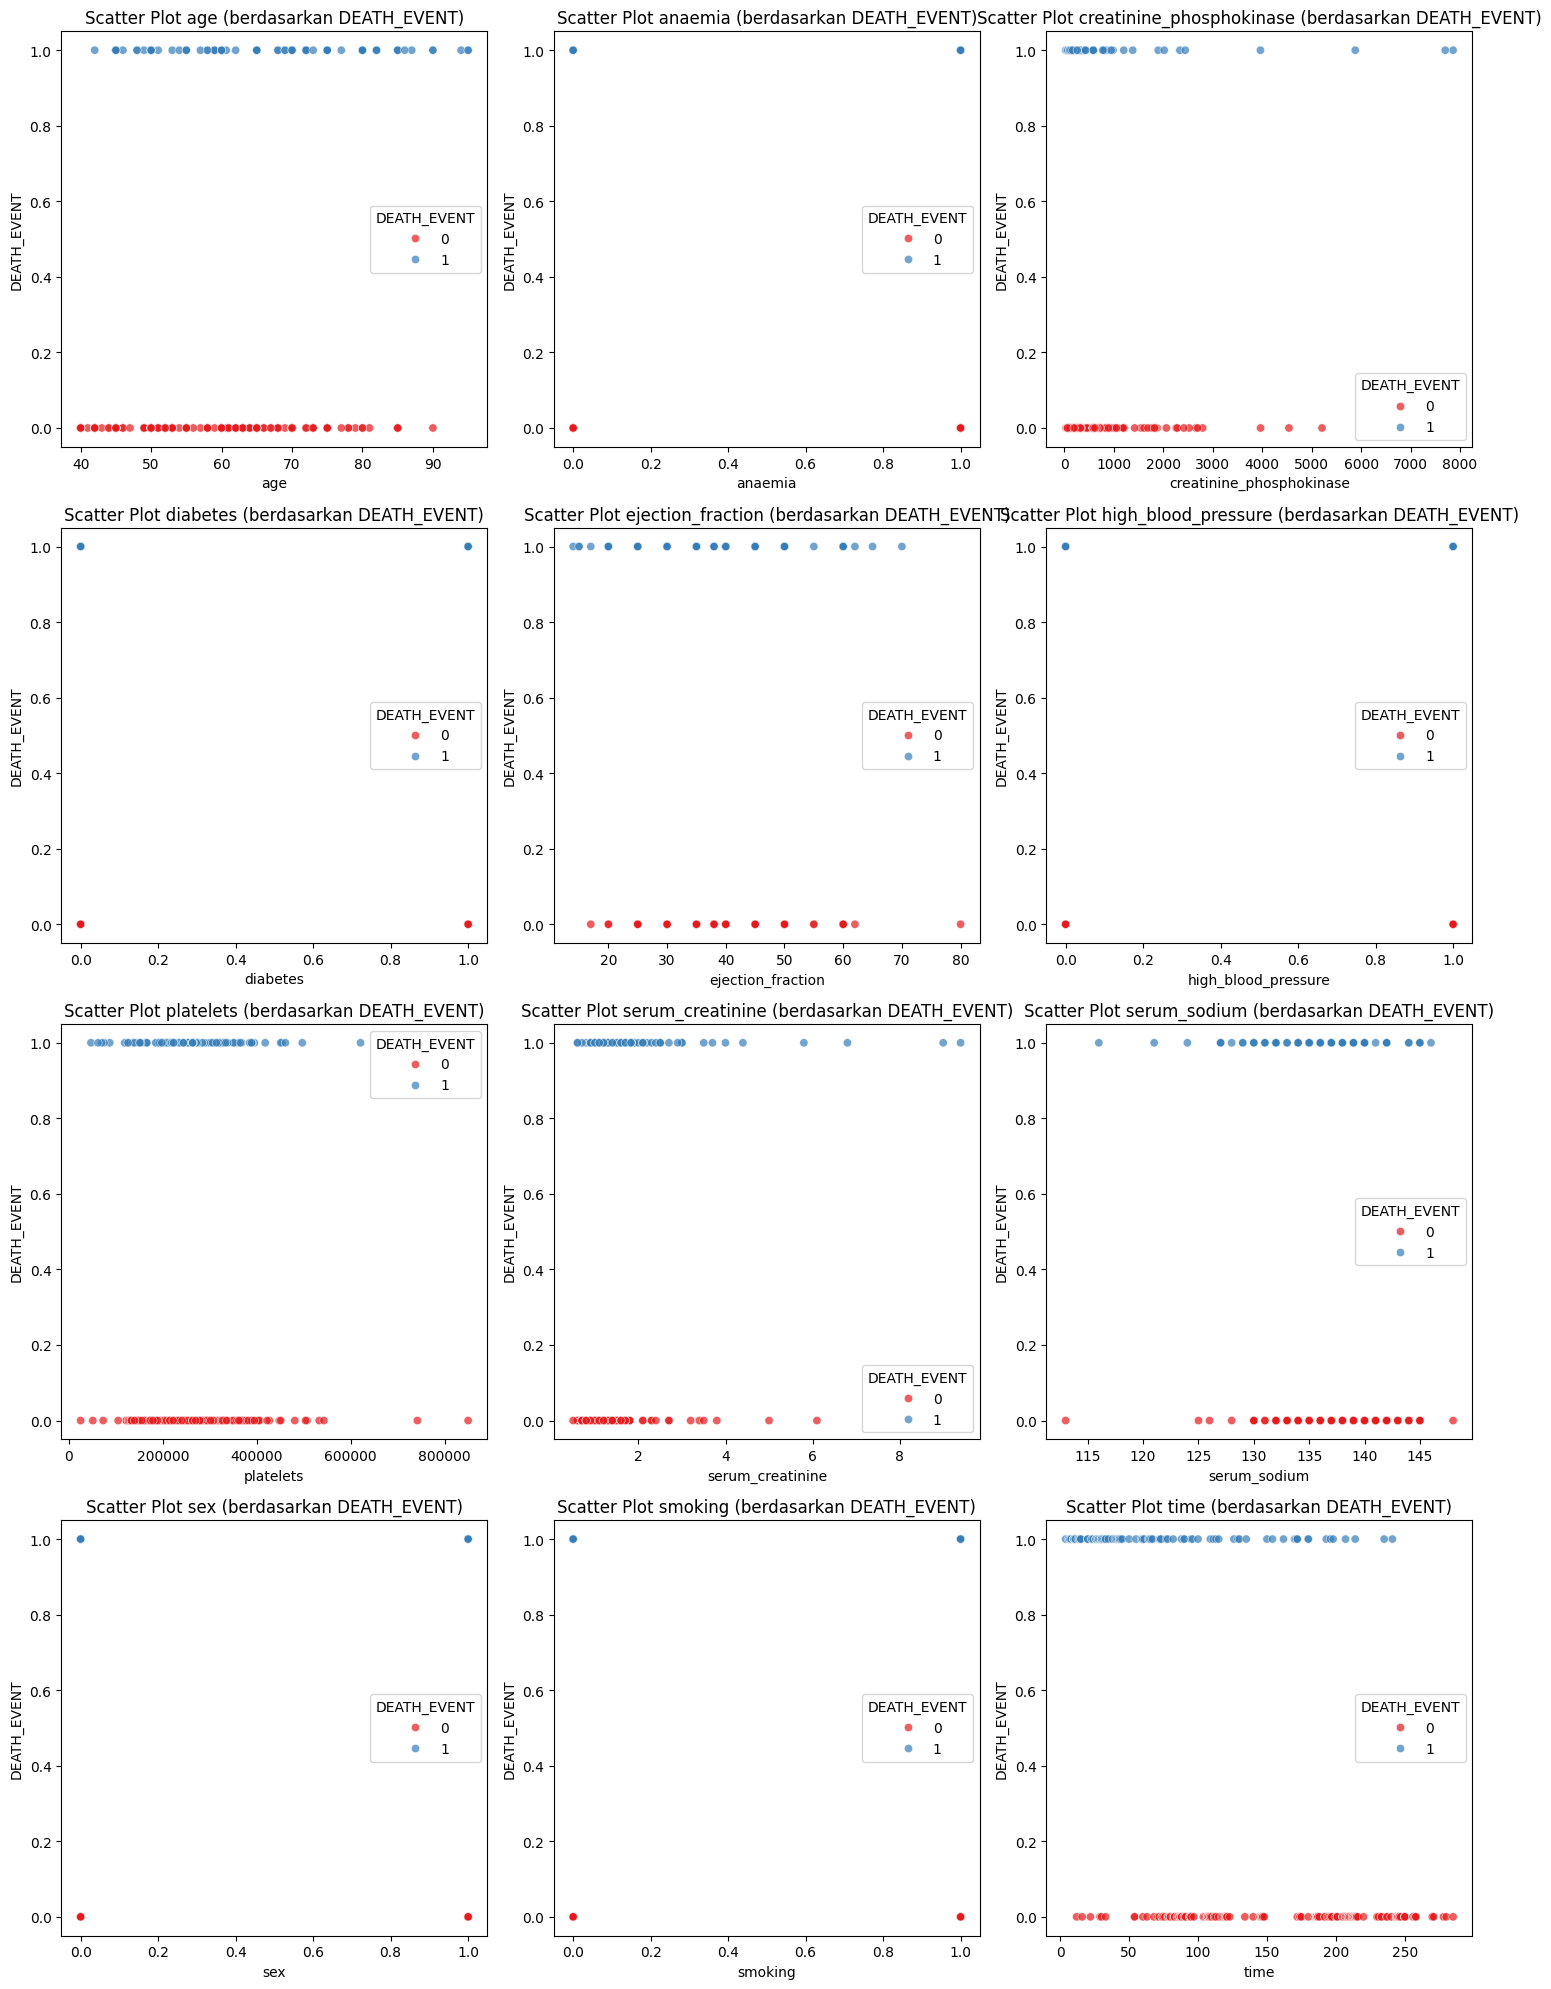

In [15]:
plt.figure(figsize=(15, 20))

# Scatter plot untuk setiap kolom numerik
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=column, y='DEATH_EVENT', data=df, hue='DEATH_EVENT', palette='Set1', alpha=0.7)
    plt.title(f'Scatter Plot {column} (berdasarkan DEATH_EVENT)')

plt.tight_layout()
plt.show()

## Persebaran data dengan boxplot

In [16]:
def Boxplot(attribute):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[attribute])
    plt.title(f'Box Plot {attribute}')

    plt.show()

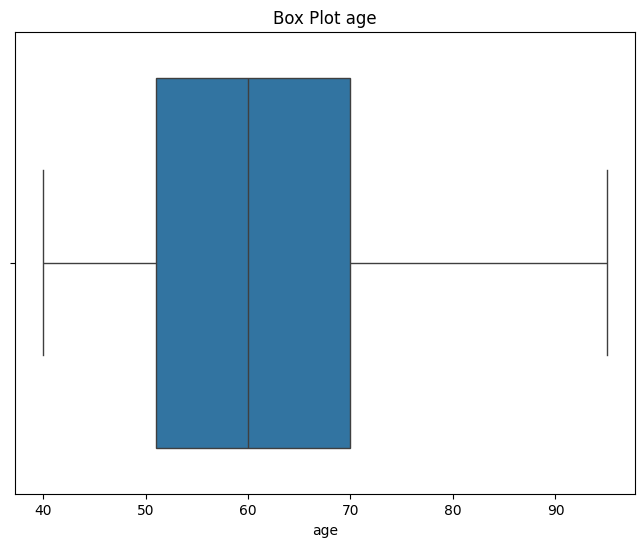

In [17]:
Boxplot('age')

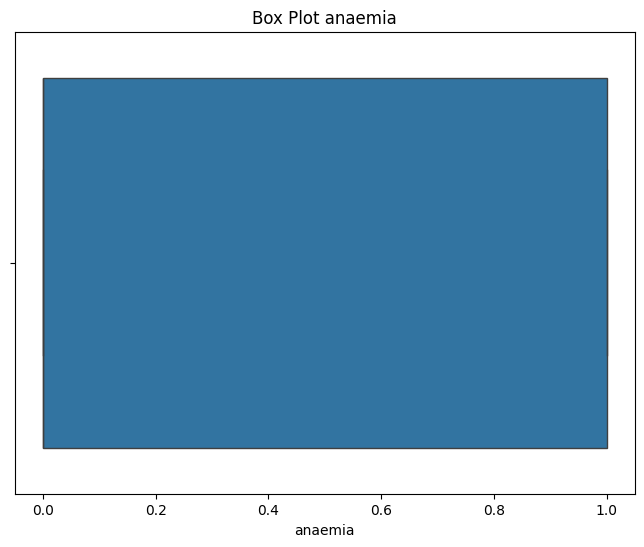

In [18]:
Boxplot('anaemia')

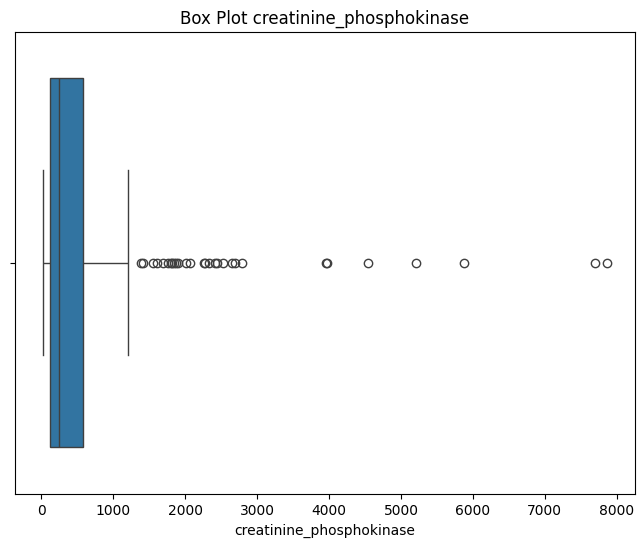

In [19]:
Boxplot('creatinine_phosphokinase')

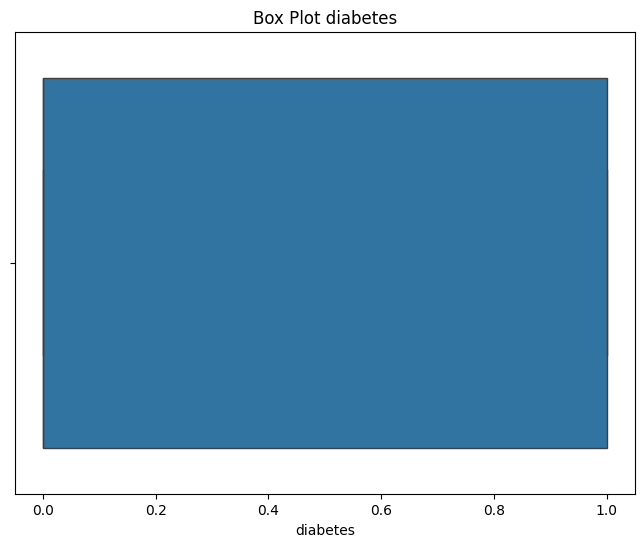

In [20]:
Boxplot('diabetes')

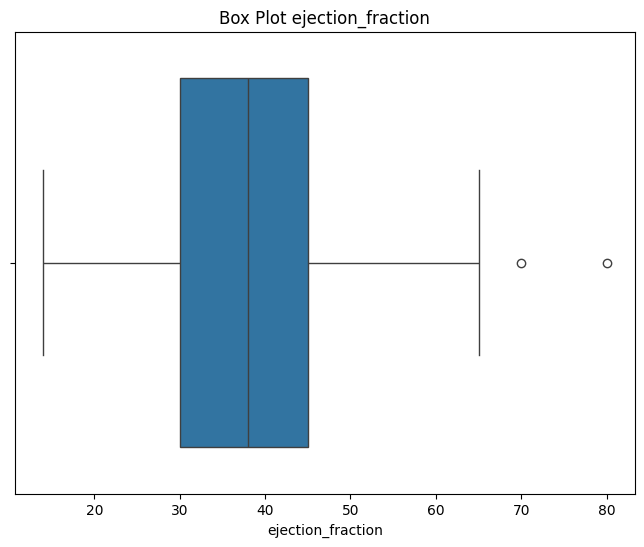

In [21]:
Boxplot('ejection_fraction')

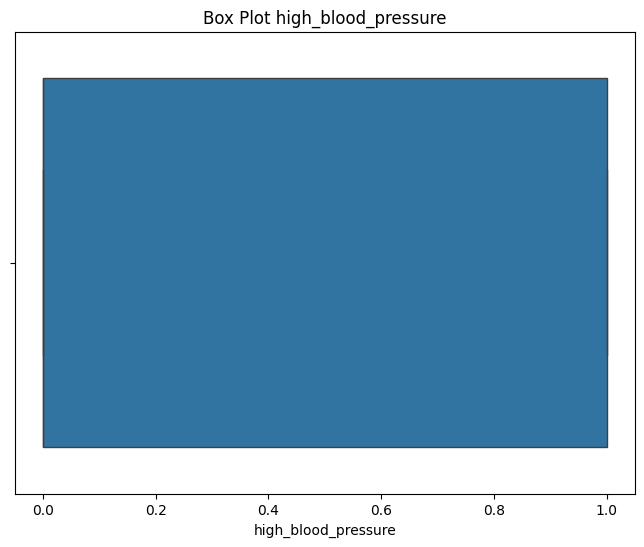

In [22]:
Boxplot("high_blood_pressure")

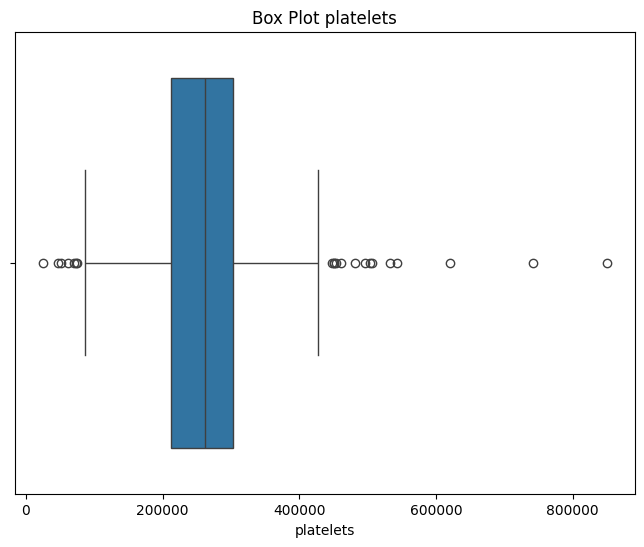

In [23]:
Boxplot('platelets')

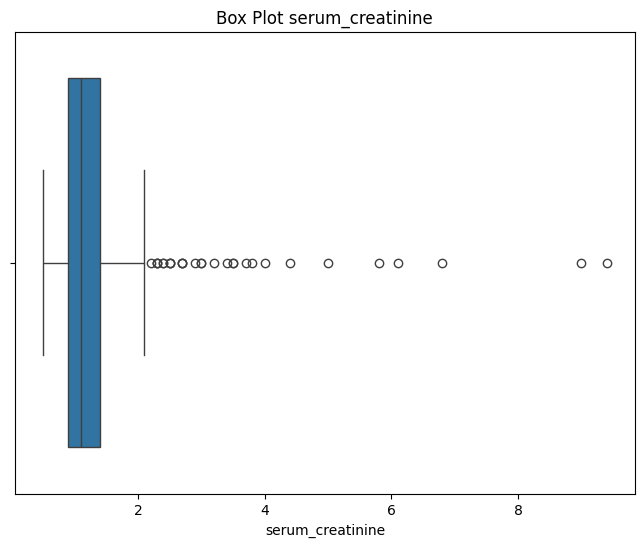

In [24]:
Boxplot('serum_creatinine')

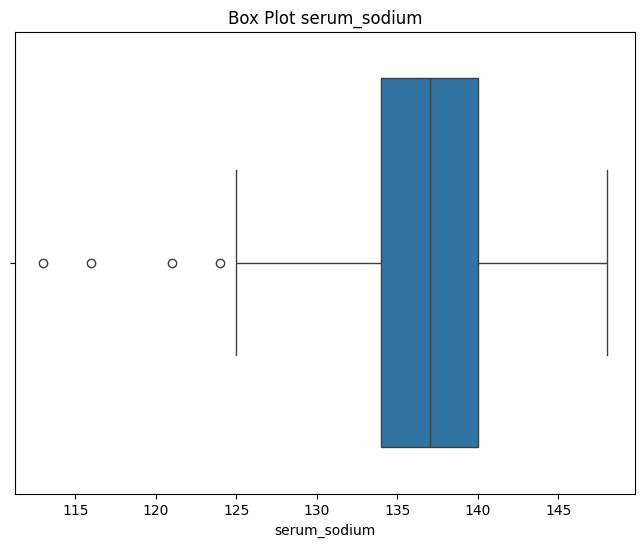

In [25]:
Boxplot('serum_sodium')


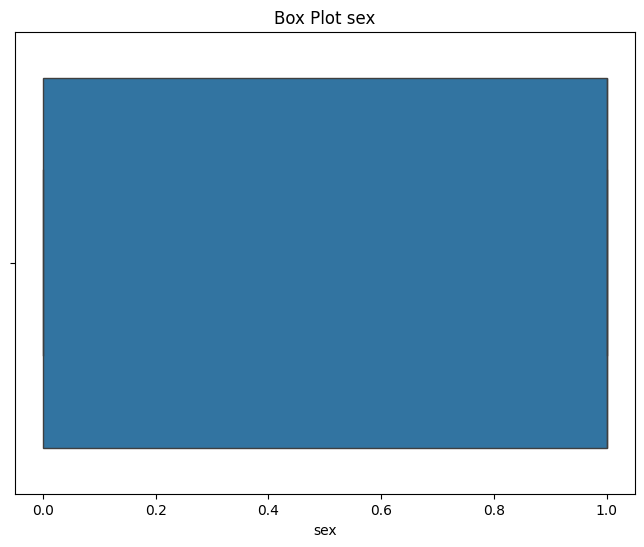

In [26]:
Boxplot("sex")

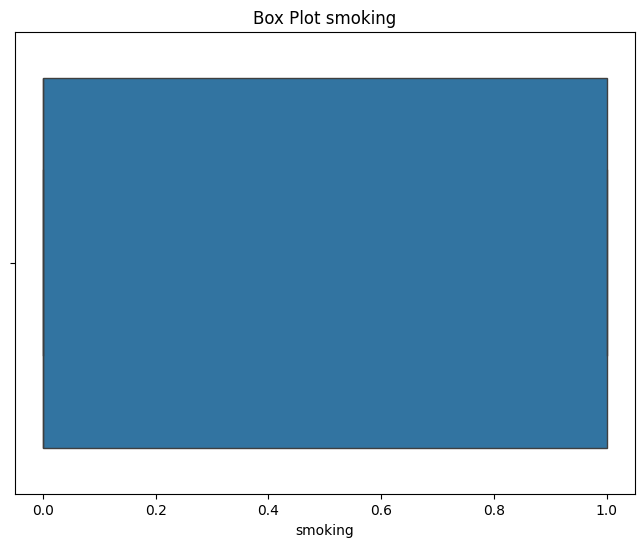

In [27]:
Boxplot("smoking")

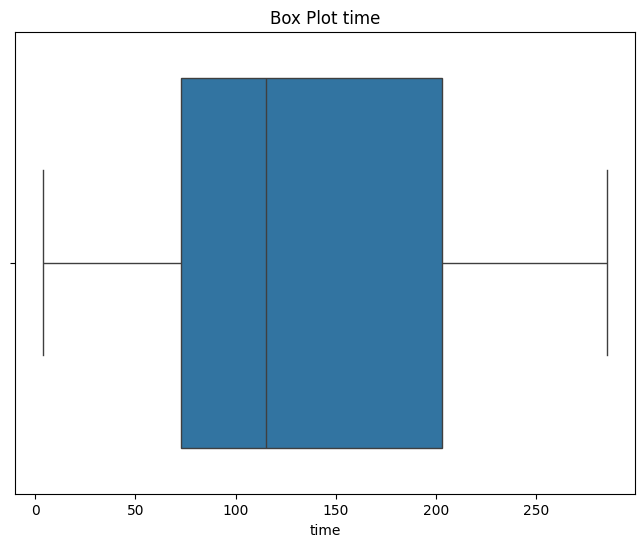

In [28]:
Boxplot('time')

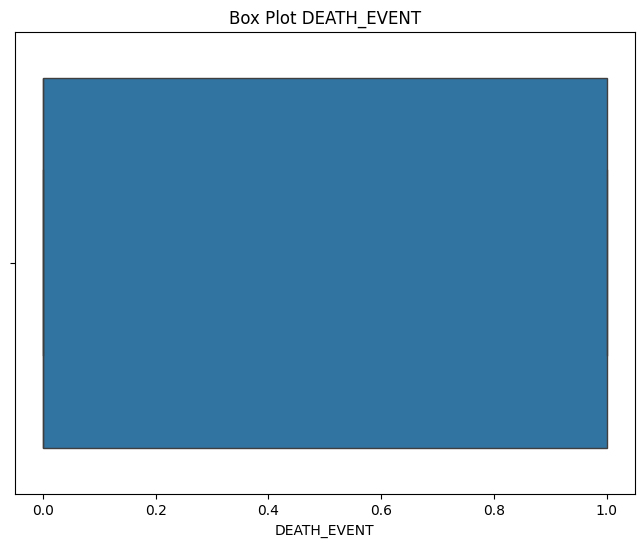

In [29]:
Boxplot("DEATH_EVENT")

## Box plot untuk atribut 'age' terhadap kolom target 'DEATH_EVENT'. 

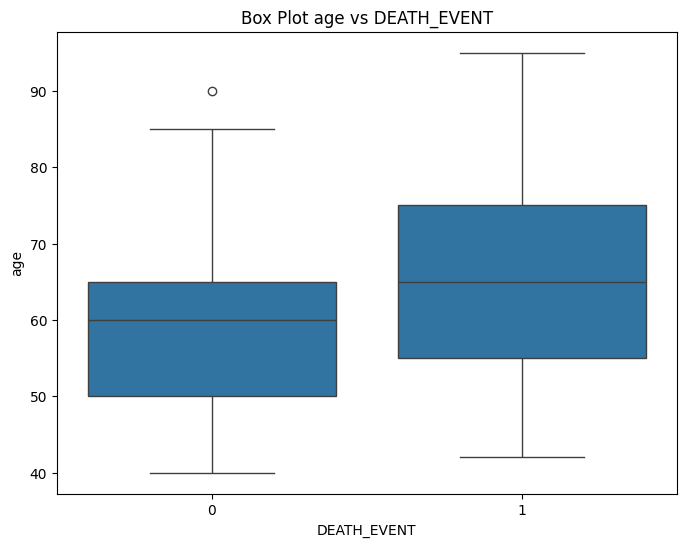

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Box Plot age vs DEATH_EVENT')

plt.show()

## Box plot untuk atribut 'creatinine_phosphokinase' terhadap kolom target 'DEATH_EVENT'. 

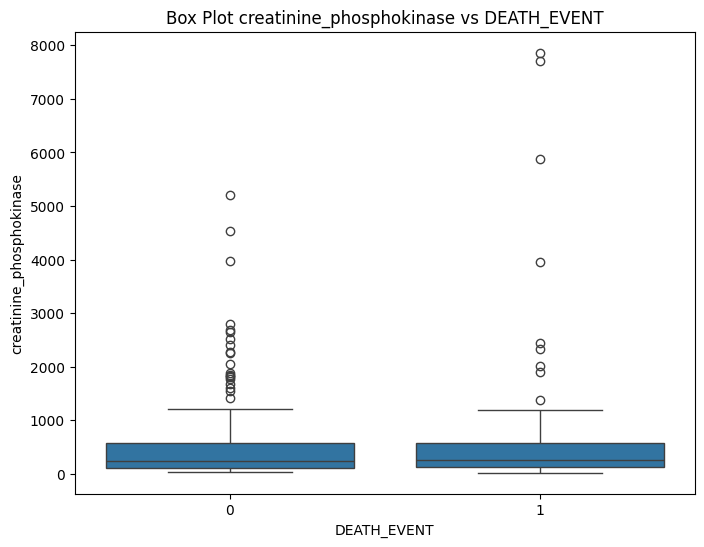

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df)
plt.title('Box Plot creatinine_phosphokinase vs DEATH_EVENT')

plt.show()

## Box plot untuk atribut 'ejection_fraction' terhadap kolom target 'DEATH_EVENT'. 

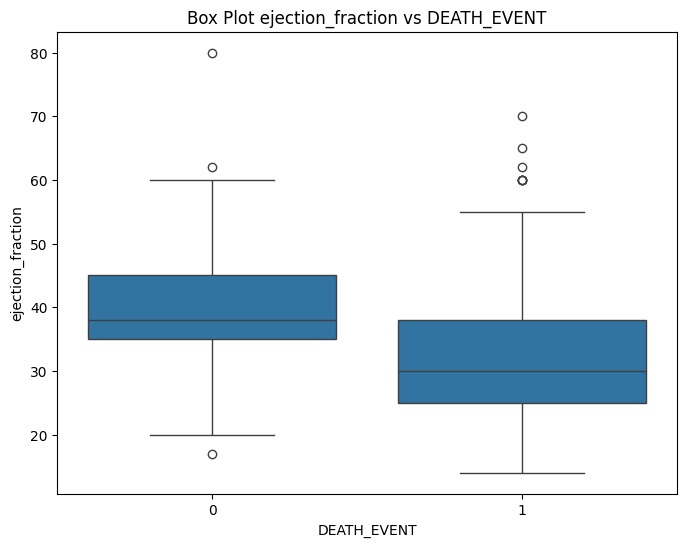

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Box Plot ejection_fraction vs DEATH_EVENT')

plt.show()

## Box plot untuk atribut 'platelets' terhadap kolom target 'DEATH_EVENT'. 

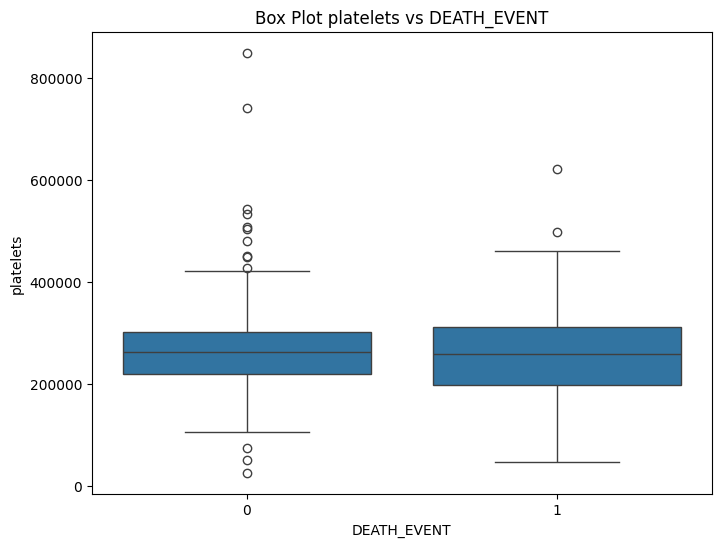

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='platelets', data=df)
plt.title('Box Plot platelets vs DEATH_EVENT')

plt.show()

## Box plot untuk atribut 'serum_creatinine' terhadap kolom target 'DEATH_EVENT'. 

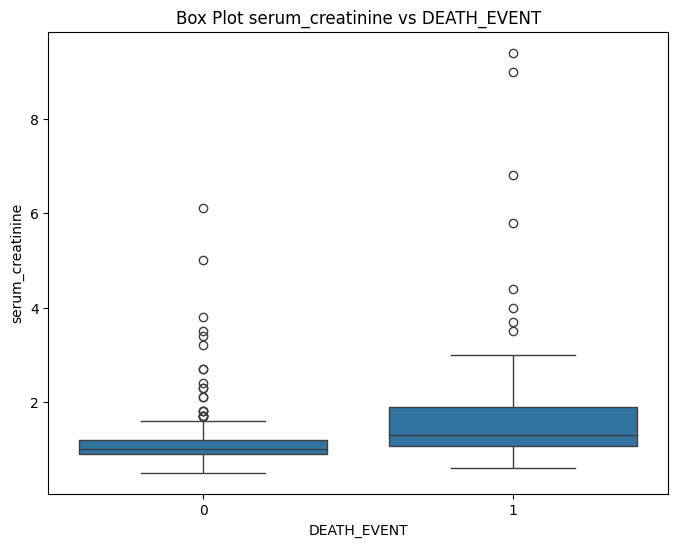

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Box Plot serum_creatinine vs DEATH_EVENT')

plt.show()

## Box plot untuk atribut 'serum_sodium' terhadap kolom target 'DEATH_EVENT'. 

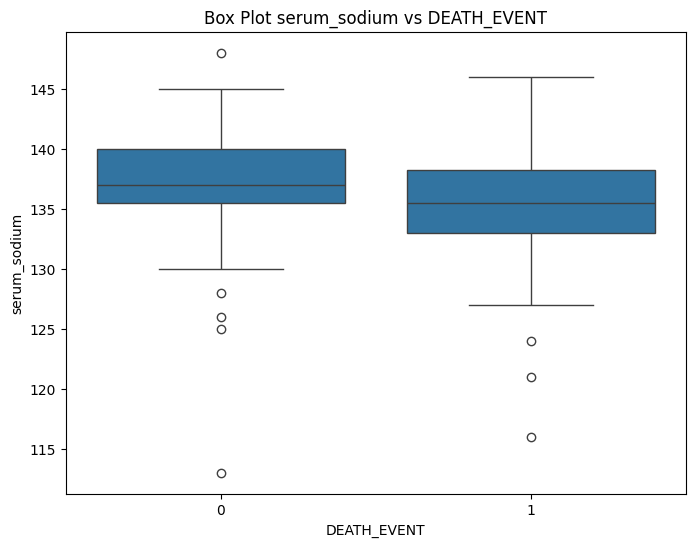

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df)
plt.title('Box Plot serum_sodium vs DEATH_EVENT')

plt.show()

## Box plot untuk atribut 'time' terhadap kolom target 'DEATH_EVENT'. 

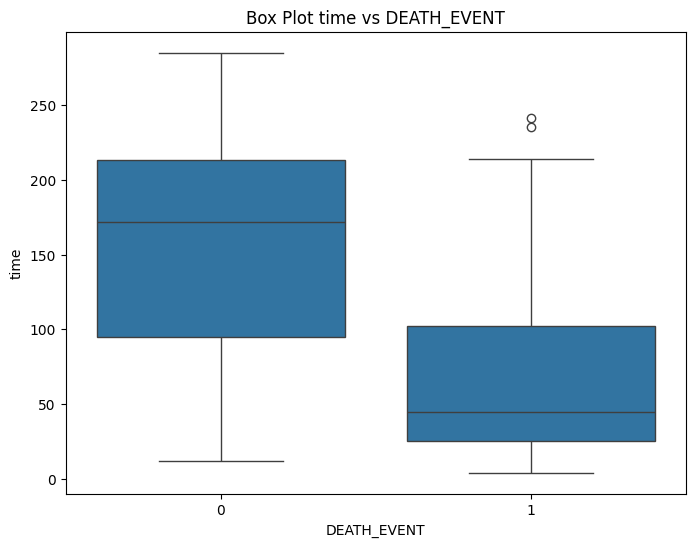

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.title('Box Plot time vs DEATH_EVENT')

plt.show()

# Data Preprocessing

## Matriks Korelasi

Matriks korelasi adalah alat statistik yang digunakan untuk mengevaluasi kekuatan dan arah hubungan linier antara dua variabel atau lebih dalam sebuah dataset. Matriks korelasi umumnya diukur dalam rentang -1 hingga 1, di mana:

- 1 menunjukkan korelasi positif sempurna (saat satu variabel naik, yang lainnya juga naik),
- -1 menunjukkan korelasi negatif sempurna (saat satu variabel naik, yang lainnya turun), dan
- 0 menunjukkan tidak adanya korelasi linier.

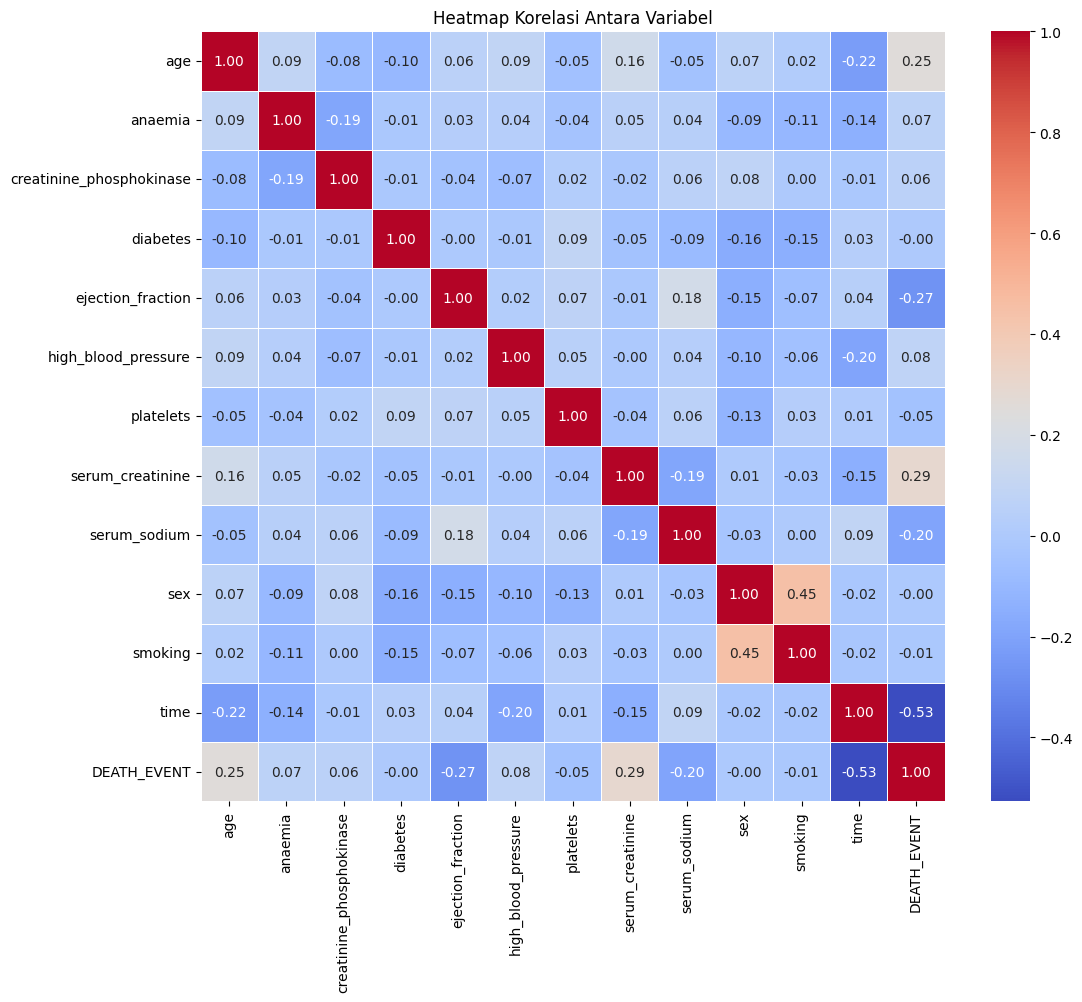

In [37]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))

# Membuat heatmap untuk matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

## Outlier

Outlier merupakan nilai yang jauh berbeda dengan nilai yang lain pada dataset. Nilai ini dapat menjadi masalah dan memengaruhi hasil analisis, sehingga nilai outlier perlu dihapus

### Memisahkan DF asli dan DF_Clear

In [38]:
df_clear = df.copy()

### Mengatasi outlier pada df_clear

In [39]:
Q1 = df_clear.quantile(0.25)
Q3 = df_clear.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
df_clear = df_clear[~((df_clear < (Q1 - 1.5 * IQR)) | (df_clear > (Q3 + 1.5 * IQR))).any(axis=1)]

# Drop NaN values
df_clear.dropna(inplace=True)

# Reset the index
df_clear.reset_index(drop=True, inplace=True)


In [40]:
df_clear['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    163
1     61
Name: count, dtype: int64

In [41]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

## Dataset DF asli

### Train Test Split

In [42]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 12), (60, 12), (239,), (60,))

### Smote Dataframe asli

In [45]:
smote = SMOTE(random_state=9)

In [46]:
# Melakukan oversampling
X_train, y_train = smote.fit_resample(X_train, y_train)

In [47]:
# Memeriksa distribusi kelas
y_train.value_counts()

DEATH_EVENT
1    158
0    158
Name: count, dtype: int64

### Robust Scaler Dataframe asli

In [48]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
print("Mean setelah standarisasi:", X_train.mean(axis=0))
print("Std dev setelah standarisasi:", X_train.std(axis=0))

Mean setelah standarisasi: [ 0.0219815   0.37658228  0.58029123  0.36075949  0.13607595  0.31012658
 -0.00295793  0.44443993  0.04177215 -0.38924051  0.28164557  0.11921669]
Std dev setelah standarisasi: [0.70476042 0.48452871 1.89421719 0.48022087 0.97983602 0.46254523
 0.96849936 1.56270753 0.80569297 0.48757803 0.44980145 0.53634851]


## Dataset DF Clear

### Train Test Split

In [50]:
X_clear = df_clear.drop('DEATH_EVENT', axis=1)

In [51]:
y_clear = df_clear['DEATH_EVENT']

In [52]:
X_clear_train, X_clear_test, y_clear_train, y_clear_test = train_test_split(X_clear, y_clear, test_size = 0.2, random_state=9)

In [53]:
X_clear_train.shape, X_clear_test.shape, y_clear_train.shape, y_clear_test.shape

((179, 12), (45, 12), (179,), (45,))

### Smote Dataframe Clear

In [54]:
smote = SMOTE(random_state=9)

In [55]:
# Melakukan oversampling
X_clear_train, y_clear_train = smote.fit_resample(X_clear_train, y_clear_train)


In [56]:
# Memeriksa distribusi kelas
y_clear_train.value_counts()


DEATH_EVENT
0    132
1    132
Name: count, dtype: int64

### Robust Scaler Dataframe Clear

In [57]:
scaler = RobustScaler()
X_clear_train = scaler.fit_transform(X_clear_train)
X_clear_test = scaler.transform(X_clear_test)


In [58]:
print("Mean setelah standarisasi:", X_clear_train.mean(axis=0))
print("Std dev setelah standarisasi:", X_clear_train.std(axis=0))


Mean setelah standarisasi: [ 0.02183424  0.43560606  0.24989154  0.31060606  0.07386364  0.28030303
 -0.03542731  0.15936902  0.13712121 -0.40530303  0.22727273  0.07763994]
Std dev setelah standarisasi: [0.69105797 0.49583608 0.56909203 0.46274176 0.73335451 0.44914724
 0.9146595  0.84251716 0.74477018 0.49095059 0.4190702  0.60273951]


# Pendefinisian Model

Setelah tahap data cleaning dan preprocessing selesai, langkah berikutnya dalam proyek ini adalah menggunakan data yang telah disiapkan untuk melatih model. Model yang dipilih untuk proyek ini adalah Random Forest, sebuah metode ensemble yang dapat memberikan performa yang baik untuk sejumlah masalah prediksi.

Random Forest merupakan sebuah algoritma machine learning yang bekerja dengan cara menggabungkan sejumlah pohon keputusan (decision trees) untuk membuat prediksi yang lebih akurat dan stabil. Keunggulan dari Random Forest terletak pada kemampuannya untuk mengatasi overfitting dan memberikan hasil yang konsisten dalam berbagai situasi.

### Random Forest Dataframe Asli (DF)

In [59]:
rf = RandomForestClassifier(random_state=10).fit(X_train, y_train)

In [60]:
# Prediksi data pada random forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf.predict(X_test)) * 100
print('Akurasi pada Random Forest Tree: {:.2f}%'.format(accuracy_rf))


Akurasi pada Random Forest Tree: 88.33%


### GridSearchCV Dataframe Asli (DF)

In [61]:
# Definisikan grid parameter untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [62]:
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=0)


In [63]:
# Melatih model dengan pencarian grid
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter Terbaik:", best_params)

Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [64]:
# Setelah didapat parameter terbaik
df_grid = RandomForestClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, n_estimators=200, random_state=10).fit(X_train, y_train)


In [65]:
# Membuat prediksi pada set pengujian
y_pred_grid = df_grid.predict(X_test)

# Menghitung akurasi model
accuracy_rf_grid = accuracy_score(y_test, y_pred_grid) * 100
print('Akurasi Model dengan Parameter Terbaik: {:.2f}%'.format(accuracy_rf_grid))


Akurasi Model dengan Parameter Terbaik: 90.00%


In [66]:
# Membuat prediksi pada set pelatihan
y_pred_grid_train = grid_search.predict(X_train)

# Menghitung akurasi pada set pelatihan
accuracy_train_rf_grid = accuracy_score(y_train, y_pred_grid_train) * 100
print("Akurasi Model pada Set Pelatihan dengan Parameter Terbaik: {:.2f}%".format(accuracy_train_rf_grid))


Akurasi Model pada Set Pelatihan dengan Parameter Terbaik: 100.00%


### Random Forest Dataframe Tanpa Outlier (DF_Clear)

In [67]:
# Inisialisasi dan latih model Random Forest dataframe clear(tanpa outlier) 
rf_clear = RandomForestClassifier(random_state=10).fit(X_clear_train, y_clear_train)

In [68]:
# Prediksi data pada random forest
y_pred_rf_clear = rf_clear.predict(X_clear_test)
accuracy_rf_clear = accuracy_score(y_clear_test, rf_clear.predict(X_clear_test)) * 100
print('Akurasi pada Random Forest Tree: {:.2f}%'.format(accuracy_rf_clear))

Akurasi pada Random Forest Tree: 91.11%


### GridSearchCV Dataframe Tanpa Outlier (DF_Clear)

In [69]:
# Definisikan grid parameter untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [70]:
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_clear, param_grid=param_grid, cv=2, n_jobs=-1, verbose=0)

In [71]:
# Melatih model dengan pencarian grid
grid_search.fit(X_clear_train, y_clear_train)

# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter Terbaik:", best_params)

Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [72]:
# Setelah didapat parameter terbaik
df_clear_grid = RandomForestClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=1, n_estimators=50, random_state=10).fit(X_clear_train, y_clear_train)

In [73]:
# Membuat prediksi pada set pengujian
y_pred_grid_clear = df_clear_grid.predict(X_clear_test)

# Menghitung akurasi model
accuracy_rf_clear_grid = accuracy_score(y_clear_test, y_pred_grid_clear) * 100
print('Akurasi Model dengan Parameter Terbaik: {:.2f}%'.format(accuracy_rf_clear_grid))

Akurasi Model dengan Parameter Terbaik: 95.56%


In [74]:
# Membuat prediksi pada set pelatihan
y_pred_grid_clear_train = grid_search.predict(X_clear_train)

# Menghitung akurasi pada set pelatihan
accuracy_train_rf_clear_grid = accuracy_score(y_clear_train, y_pred_grid_clear_train) * 100
print("Akurasi Model pada Set Pelatihan dengan Parameter Terbaik: {:.2f}%".format(accuracy_train_rf_clear_grid))

Akurasi Model pada Set Pelatihan dengan Parameter Terbaik: 99.62%


In [75]:
# Dataframe asli
df_X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
df_X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

# Datframe tanpa outlier
df_clear_X_train = pd.DataFrame(X_clear_train, columns=df_clear.columns[:-1])
df_clear_X_test = pd.DataFrame(X_clear_test, columns=df_clear.columns[:-1])

# Menggabungkan kedua DataFrame untuk X_train dan X_test
df_comparison_X_train = pd.concat([df_X_train, df_clear_X_train], axis=1, keys=['Original', 'Clear'])
df_comparison_X_test = pd.concat([df_X_test, df_clear_X_test], axis=1, keys=['Original', 'Clear'])

# Menampilkan DataFrame perbandingan
print("Perbandingan antara X_train:")
print(df_comparison_X_train.head(4))
print("\nPerbandingan antara X_test:")
print(df_comparison_X_test.head(4))

Perbandingan antara X_train:
  Original                                                              \
       age anaemia creatinine_phosphokinase diabetes ejection_fraction   
0     0.47    1.00                    -0.52     1.00              1.25   
1    -0.08    1.00                    -0.34     1.00              0.42   
2    -0.12    1.00                    -0.10     1.00              0.25   
3     0.18    1.00                    -0.10     1.00             -0.83   

                                                                             \
  high_blood_pressure platelets serum_creatinine serum_sodium   sex smoking   
0                1.00      0.92            -0.29        -0.40 -1.00    0.00   
1                1.00     -0.66            -0.29         0.00 -1.00    0.00   
2                0.00     -0.09             1.46        -0.80 -1.00    1.00   
3                0.00     -0.69             0.29        -1.40  0.00    0.00   

        Clear                                      

## Perbandingan akurasi antar dataframe

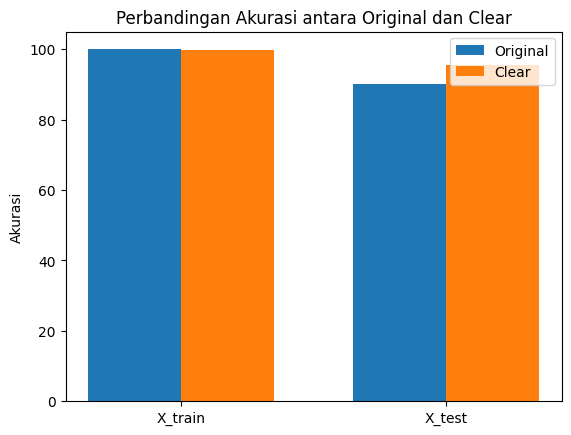

In [76]:
def plot_accuracy_comparison(original_accuracy, clear_accuracy):
    labels = ['X_train', 'X_test']
    width = 0.35

    x = np.arange(len(labels))
    fig, ax = plt.subplots()
    rect1 = ax.bar(x - width/2, original_accuracy, width, label='Original')
    rect2 = ax.bar(x + width/2, clear_accuracy, width, label='Clear')

    ax.set_ylabel('Akurasi')
    ax.set_title('Perbandingan Akurasi antara Original dan Clear')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Membuat diagram batang perbandingan akurasi untuk X_train dan X_test
plot_accuracy_comparison([accuracy_train_rf_grid , accuracy_rf_grid], [accuracy_train_rf_clear_grid, accuracy_rf_clear_grid])

X_Train: 
- Dataframe Asli (DF) : 100%
- Dataframe Tanpa Outlier (DF_Clear) : 99.62%

X_Test:
- Dataframe Asli (DF) : 90%
- Dataframe Tanpa Outlier (DF_Clear) : 95.56%

Model yang diuji menggunakan dataset yang telah dihapus outlier menampilkan akurasi yang lebih tinggi dibandingkan dengan pengujian pada dataset asli menunjukkan bahwa penghapusan outlier dapat membantu model lebih baik dalam melakukan prediksi pada data baru yang tidak terdapat dalam dataset pelatihan.

# Evaluasi Model


Evaluasi model merupakan menguji akurasi dari data testing. Evaluasi dilakukan dengan menggunakan akurasi (accuracy), presisi (precision), recall, F1-score, dan matriks konfusi.
- Accuracy        : Mengukur sejauh mana model berhasil memprediksi dengan benar semua kelas (positif dan negatif) dibandingkan dengan total prediksi.
- Precision       : Mengukur sejauh mana prediksi positif dari model adalah benar. Ini memberikan informasi tentang seberapa baik model melakukan klasifikasi positif.
- Recall          : Mengukur sejauh mana model dapat mengidentifikasi keseluruhan kelas positif. Ini memberikan informasi tentang seberapa baik model mengatasi kelas positif.
- F1 Score        : Menggabungkan presisi dan recall dalam satu metrik tunggal. Ini berguna ketika kita ingin mencari keseimbangan antara presisi dan recall.
- Matriks konfusi : Tabel yang digunakan untuk mengevaluasi kinerja model, terutama pada tugas klasifikasi. Ini menyajikan jumlah True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).

## Accuracy, Precision, Recall, F1 Score

### Dataframe asli (DF)

In [77]:
y_pred_grid = df_grid.predict(X_test)
y_pred_grid_train = grid_search.predict(X_train)

accuracy_rf_grid = accuracy_score(y_test, y_pred_grid) * 100
print('Akurasi Test : {:.2f}%'.format(accuracy_rf_grid))

accuracy_train_rf_grid = accuracy_score(y_train, y_pred_grid_train) * 100
print('Akurasi Train : {:.2f}%'.format(accuracy_train_rf_grid))

precision = precision_score(y_test, y_pred_grid)
print('Precision :', precision)

recall = recall_score(y_test, y_pred_grid)
print('Recall :', recall)

f1 = f1_score(y_test, y_pred_grid)
print('F1 Score :', f1)

Akurasi Test : 90.00%
Akurasi Train : 85.76%
Precision : 0.7368421052631579
Recall : 0.9333333333333333
F1 Score : 0.8235294117647058


In [78]:
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        45
           1       0.70      0.93      0.80        15

    accuracy                           0.88        60
   macro avg       0.84      0.90      0.86        60
weighted avg       0.91      0.88      0.89        60



### Dataframe tanpa outlier (DF_Clear)

In [79]:
y_pred_grid_clear = df_clear_grid.predict(X_clear_test)
y_pred_grid_clear_train = grid_search.predict(X_clear_train)

accuracy_rf_clear_grid = accuracy_score(y_clear_test, y_pred_grid_clear) * 100
print('Akurasi Test : {:.2f}%'.format(accuracy_rf_clear_grid))

accuracy_train_rf_clear_grid = accuracy_score(y_clear_train, y_pred_grid_clear_train) * 100
print('Akurasi Train : {:.2f}%'.format(accuracy_train_rf_clear_grid))

precision = precision_score(y_clear_test, y_pred_grid_clear)
print('Precision :', precision)

recall = recall_score(y_clear_test, y_pred_grid_clear)
print('Recall :', recall)

f1 = f1_score(y_clear_test, y_pred_grid_clear)
print('F1 Score :', f1)

Akurasi Test : 95.56%
Akurasi Train : 99.62%
Precision : 0.875
Recall : 1.0
F1 Score : 0.9333333333333333


In [80]:
report = classification_report(y_clear_test, y_pred_rf_clear)
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45



## Confusion Matrix

### Dataframe asli (DF)

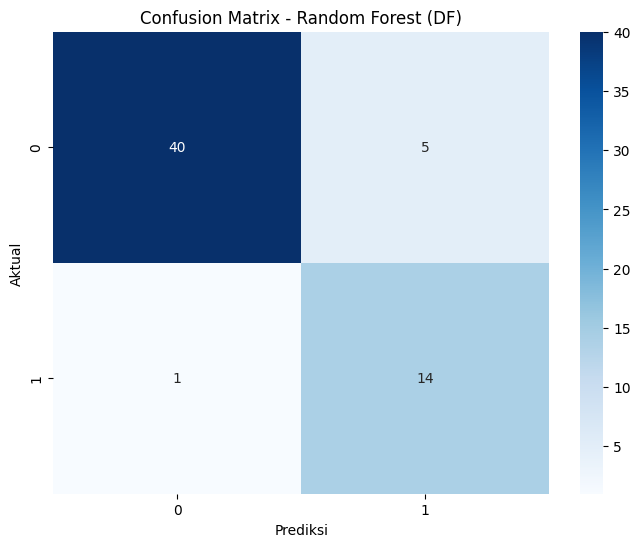

In [81]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_grid)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest (DF)')
plt.show()

Confusion Matrix adalah tabel yang digunakan dalam evaluasi kinerja model klasifikasi.

- TN (True Negative): 40 kasus yang benar diprediksi sebagai "no death" (0).
- FP (False Positive): 5 kasus yang seharusnya "no death" (0), tetapi diprediksi sebagai "death" (1).
- FN (False Negative): 1 kasus yang seharusnya "death" (1), tetapi diprediksi sebagai "no death" (0).
- TP (True Positive): 14 kasus yang benar diprediksi sebagai "death" (1).

### Dataframe tanpa outlier (DF_Clear)

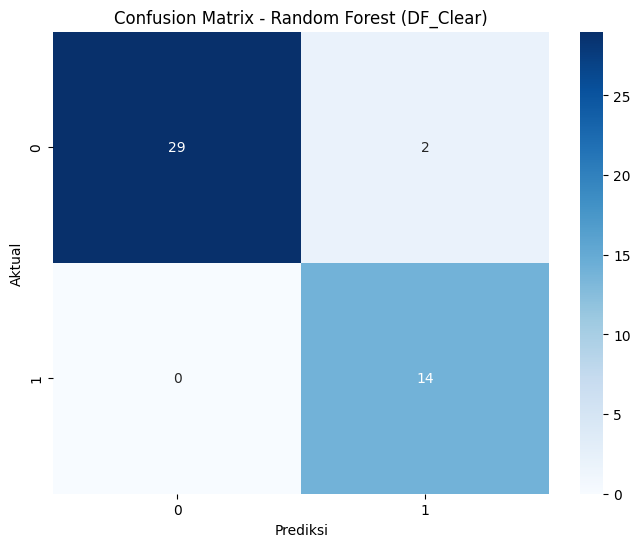

In [82]:
conf_mat_clear = metrics.confusion_matrix(y_clear_test, y_pred_grid_clear)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_clear, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest (DF_Clear)')
plt.show()


Confusion Matrix adalah tabel yang digunakan dalam evaluasi kinerja model klasifikasi.

- TN (True Negative): 29 kasus yang benar diprediksi sebagai "no death" (0).
- FP (False Positive): 2 kasus yang seharusnya "no death" (0), tetapi diprediksi sebagai "death" (1).
- FN (False Negative): 0 kasus yang seharusnya "death" (1), tetapi diprediksi sebagai "no death" (0).
- TP (True Positive): 14 kasus yang benar diprediksi sebagai "death" (1).

# Model Inference

Model Inference merupakan pelatihan model yang kita buat dengan data selain data yang sudah tersedia. Model tersebut kita latih dengan data yang telah dibuat seperti dibawah ini.

In [83]:
df_clear.sample(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
143,45.00,0,582,0,20,1,126000.00,1.60,135,1,0,180,1
176,70.00,0,232,0,30,0,173000.00,1.20,132,1,0,210,0
40,72.00,0,364,1,20,1,254000.00,1.30,136,1,1,59,1
201,55.00,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1
177,65.00,1,720,1,40,0,257000.00,1.00,136,0,0,210,0
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1


In [84]:
df_inference = pd.DataFrame({
    'age': [65, 55, 42, 33],
    'anaemia': [0, 1, 0, 1],
    'creatinine_phosphokinase': [146, 200, 180, 250],
    'diabetes': [1, 0, 1, 0],
    'ejection_fraction': [38, 50, 40, 45],
    'high_blood_pressure': [1, 0, 1, 0],
    'platelets': [262000, 220000, 240000, 200000],
    'serum_creatinine': [1.0, 2.0, 1.11, 1.33],
    'serum_sodium': [100, 111, 120, 125],
    'sex': [1, 0, 1, 0],
    'smoking': [0, 1, 0, 1],
    'time': [9, 13, 3, 15]
})

df_inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,65,0,146,1,38,1,262000,1.00,100,1,0,9
1,55,1,200,0,50,0,220000,2.00,111,0,1,13
2,42,0,180,1,40,1,240000,1.11,120,1,0,3
3,33,1,250,0,45,0,200000,1.33,125,0,1,15


In [85]:
predict_inference = df_clear_grid.predict(df_inference)
predict_inference

array([0, 0, 0, 0], dtype=int64)

# Kesimpulan

## DataFrame Asli (DF)
- Model pada DataFrame asli memiliki tingkat akurasi yang baik pada data tes sekitar 90%, dan mencapai akurasi sempurna (100%) pada data latih. 
- Precision yang baik menunjukkan bahwa model jarang memberikan prediksi positif palsu, sedangkan recall yang tinggi menandakan model dapat dengan baik mengidentifikasi kelas positif sebenarnya.

## DataFrame Tanpa Outlier (DF_Clear)
- Penghapusan outlier meningkatkan kinerja model, terlihat dari peningkatan akurasi pada kedua data latih dan tes.
- Tingkat akurasi yang tinggi pada data tes (95.56%) dan data latih (99.62%) menunjukkan bahwa model dapat memberikan prediksi yang baik tanpa dipengaruhi oleh outlier.
- Precision dan recall yang tinggi menandakan bahwa model dapat memberikan prediksi yang akurat dan konsisten pada kelas positif.

## Analisis
- Pembersihan outlier memberikan dampak positif terhadap performa model, terlihat dari peningkatan akurasi dan metrik evaluasi lainnya pada DataFrame tanpa outlier.
- Model pada DataFrame tanpa outlier menunjukkan kemampuan yang lebih baik dalam mengklasifikasikan kelas positif, yang dapat diandalkan untuk keperluan prediksi pada data baru.
- Pada project ini, kami membangun ensemble model menggunakan algoritma random forest.
- Dalam pengembangan model ini, kami melakukan penyesuaian hyperparameter menggunakan GridSearch untuk mencari kombinasi hyperparameter yang memberikan performa terbaik.
- Kami juga melakukan evaluasi model dengan menggunakan akurasi (accuracy), presisi (precision), recall, F1-score, dan matriks konfusi untuk mengukur seberapa bagus kinerja model.
- Kemudian juga membangun model inference dan hasil prediksi adalah array [0, 0, 0, 0], artinya, berdasarkan atribut yang diberikan pada dataframe baru, model memprediksi bahwa pasien tidak mengalami kematian berdasarkan dataset yang telah digunakan untuk melatih model.

## Akhir Kata
Melalui proyek ini, kami berhasil membangun model Random Forest yang dapat memprediksi kematian pasien berdasarkan atribut klinis. Kesimpulan ini diharapkan dapat memberikan wawasan dan informasi yang berguna dalam konteks medis dan pengelolaan rekam medis pasien.